,ds,y
8990,2021-12-10 14:00:00,13.03
8991,2021-12-10 15:00:00,13.05
8992,2021-12-10 16:00:00,13.00
8993,2021-12-10 17:00:00,12.90
8994,2021-12-10 18:00:00,12.79
8995,2021-12-10 19:00:00,12.56
8996,2021-12-10 20:00:00,12.15
8997,2021-12-10 21:00:00,12.21
8998,2021-12-10 22:00:00,11.95
8999,2021-12-10 23:00:00,11.45


<Figure size 1152x432 with 0 Axes>

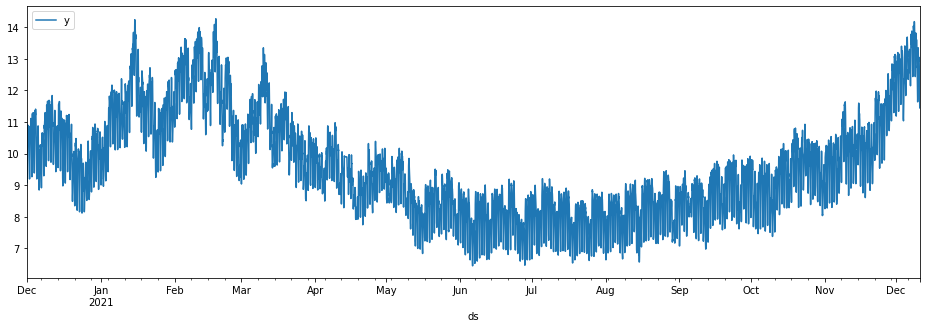

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import os
from neuralprophet import NeuralProphet
import logging
import urllib.parse as url
import warnings
import numpy as np

logging.getLogger('fbprophet').setLevel(logging.ERROR)

warnings.filterwarnings("ignore")

data_series = [
    'CNPFI',
    # 'SPOTSE3',
    # 'PRONPWIND_F', 'PRODEWIND_F', 'PRONLWIND_F', 'PROUKWIND_F', 'PRODKWIND_F', 'PROFIWIND_F', 'PROSEWIND_F', 'PROEEWIND_F', 'PRONOWIND_F', 'PROLTWIND_F', 'PROLVWIND_F',
    # 'PRODKSOL_F', 'PRODESOL_F', 'PROUKSOL_F',
    # 'CNPNP_F', 'CNPDE_F', 'CNPNL_F', 'CNPDEN_F', 'CNPUK_F', 'CNPFI_F', 'CNPSE_F', 'CNPEE_F', 'CNPNO_F', 'CNPLT_F', 'CNPLV_F',
    # 'PROSENUC_F', 'PROFINUC_F'
]
column_names = [
    'y'
    # 'wind_prod_np', 'wind_prod_de', 'wind_prod_nl', 'wind_prod_uk', 'wind_prod_dk', 'wind_prod_fi', 'wind_prod_se', 'wind_prod_ee', 'wind_prod_no', 'wind_prod_lt', 'wind_prod_lv',
    # 'solar_prod_dk', 'solar_prod_de', 'solar_prod_uk',
    # 'cnp_np', 'cnp_de', 'cnp_nl', 'cnp_dk', 'cnp_uk', 'cnp_fi', 'cnp_se', 'cnp_ee', 'cnp_no', 'cnp_lt', 'cnp_lv',
    # 'nuc_prod_se', 'nuc_prod_fi'
]

history_start_date = date(year=2020, month=12, day=1)
history_end_date = date(year=2021, month=12, day=1)
forecast_end_date = date(year=2021, month=12, day=10)

request = {
    "series": ','.join(data_series),
    'interval': 'hour',
    'start': history_start_date.strftime('%Y-%m-%d'),
    'end': forecast_end_date.strftime('%Y-%m-%d'),
    'token': '8ycj3jSf2DJZOtX',
    'emptydata': 'yes',
    'currency': '',
    'dateFormat': 'nbno',
    'numberFormat': 'nothousandsdot',
    'fileformat': 'csv',
    'headers': 'no'
}

dataUrl = f'https://syspower5.skm.no/api/webquery/execute?{url.urlencode(request)}'
data = pd.read_csv(dataUrl, sep=';', index_col=0, parse_dates=True, dayfirst=True,
                   header=None, names = ['ds'] + column_names).interpolate().reset_index()

plt.figure(figsize=(16, 6))
data.plot(x='ds', y='y', figsize=(16, 5))

data.tail(10)

,ds,temp_fi,temp_dk,temp_se,temp_no,temp_np
8991,2021-12-10 15:00:00,-3.100000,1.187500,0.8,-0.012500,-0.1375
8992,2021-12-10 16:00:00,-2.966667,1.166667,0.8,0.033333,-0.1000
8993,2021-12-10 17:00:00,-2.833333,1.145833,0.8,0.079167,-0.0625
8994,2021-12-10 18:00:00,-2.700000,1.125000,0.8,0.125000,-0.0250
8995,2021-12-10 19:00:00,-2.566667,1.104167,0.8,0.170833,0.0125
8996,2021-12-10 20:00:00,-2.433333,1.083333,0.8,0.216667,0.0500
8997,2021-12-10 21:00:00,-2.300000,1.062500,0.8,0.262500,0.0875
8998,2021-12-10 22:00:00,-2.166667,1.041667,0.8,0.308333,0.1250
8999,2021-12-10 23:00:00,-2.033333,1.020833,0.8,0.354167,0.1625
9000,2021-12-11 00:00:00,-1.900000,1.000000,0.8,0.400000,0.2000


<Figure size 1152x432 with 0 Axes>

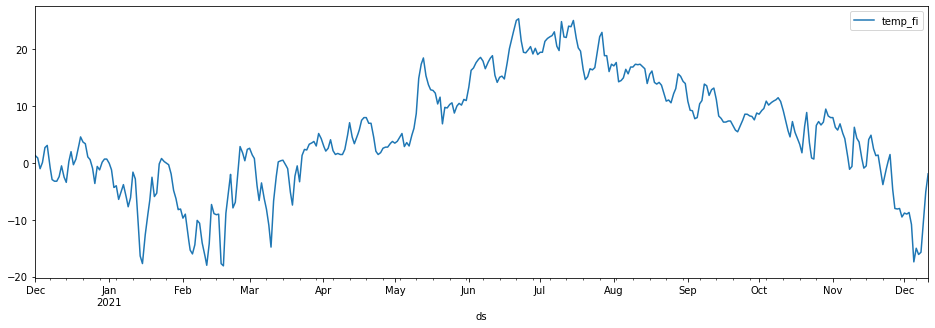

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import os
from neuralprophet import NeuralProphet
import logging
import urllib.parse as url
import warnings
import numpy as np

logging.getLogger('fbprophet').setLevel(logging.ERROR)

warnings.filterwarnings("ignore")

data_series = [
    'SMHITEMPFI_F', 'SMHITEMPDK_F', 'SMHITEMPSE_F', 'SMHITEMPNO_F', 'SMHITEMPNP_F'
]
column_names = [
    'temp_fi', 'temp_dk', 'temp_se', 'temp_no', 'temp_np'
]

temp_date = forecast_end_date + timedelta(days=1)
request = {
    "series": ','.join(data_series),
    'interval': 'day',
    'start': history_start_date.strftime('%Y-%m-%d'),
    'end': temp_date.strftime('%Y-%m-%d'),
    'token': '8ycj3jSf2DJZOtX',
    'emptydata': 'yes',
    'currency': '',
    'dateFormat': 'nbno',
    'numberFormat': 'nothousandsdot',
    'fileformat': 'csv',
    'headers': 'no'
}

dataUrl = f'https://syspower5.skm.no/api/webquery/execute?{url.urlencode(request)}'
temp_data = pd.read_csv(dataUrl, sep=';', index_col=0, parse_dates=True, dayfirst=True,
                   header=None, names = ['ds'] + column_names).interpolate().reset_index()


temp_data['ds'] = pd.to_datetime(temp_data['ds'])
temp_data.set_index('ds', inplace=True)
temp_data = temp_data.resample('H').interpolate()
temp_data = temp_data.reset_index()
plt.figure(figsize=(16, 6))
temp_data.plot(x='ds', y='temp_fi', figsize=(16, 5))

temp_data.tail(10)

In [4]:
data = pd.merge(left=data, right=temp_data, on='ds', how='left')
data.tail(10)

,ds,y,temp_fi,temp_dk,temp_se,temp_no,temp_np
8990,2021-12-10 14:00:00,13.03,-3.233333,1.208333,0.8,-0.058333,-0.1750
8991,2021-12-10 15:00:00,13.05,-3.100000,1.187500,0.8,-0.012500,-0.1375
8992,2021-12-10 16:00:00,13.00,-2.966667,1.166667,0.8,0.033333,-0.1000
8993,2021-12-10 17:00:00,12.90,-2.833333,1.145833,0.8,0.079167,-0.0625
8994,2021-12-10 18:00:00,12.79,-2.700000,1.125000,0.8,0.125000,-0.0250
8995,2021-12-10 19:00:00,12.56,-2.566667,1.104167,0.8,0.170833,0.0125
8996,2021-12-10 20:00:00,12.15,-2.433333,1.083333,0.8,0.216667,0.0500
8997,2021-12-10 21:00:00,12.21,-2.300000,1.062500,0.8,0.262500,0.0875
8998,2021-12-10 22:00:00,11.95,-2.166667,1.041667,0.8,0.308333,0.1250
8999,2021-12-10 23:00:00,11.45,-2.033333,1.020833,0.8,0.354167,0.1625


In [5]:
temperature = np.tile(data.loc[:, ['temp_fi', 'temp_np', 'temp_dk', 'temp_no', 'temp_se']].to_numpy(), (5, 1))
temperature

array([[ 1.3       ,  1.9       ,  3.7       ,  1.7       ,  1.3       ],
       [ 1.28333333,  1.90833333,  3.70833333,  1.7       ,  1.32916667],
       [ 1.26666667,  1.91666667,  3.71666667,  1.7       ,  1.35833333],
       ...,
       [-2.3       ,  0.0875    ,  1.0625    ,  0.2625    ,  0.8       ],
       [-2.16666667,  0.125     ,  1.04166667,  0.30833333,  0.8       ],
       [-2.03333333,  0.1625    ,  1.02083333,  0.35416667,  0.8       ]])

MAE = 0.31364285714285717
diff = 671.9354838709676


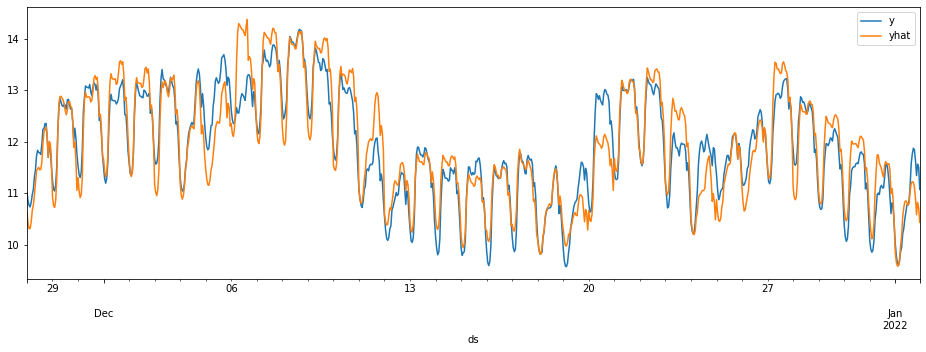

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import os
from neuralprophet import NeuralProphet
import logging
import urllib.parse as url
import warnings
import numpy as np

data_series = [
    'CNPFI', 'CNPFI_F'
]

column_names = [
    'y', 'yhat'
]

history_start_date = date(year=2021, month=11, day=28)
forecast_end_date = date(year=2022, month=1, day=1)

request = {
    "series": ','.join(data_series),
    'interval': 'hour',
    'start': history_start_date.strftime('%Y-%m-%d'),
    'end': forecast_end_date.strftime('%Y-%m-%d'),
    'token': '8ycj3jSf2DJZOtX',
    'emptydata': 'yes',
    'currency': '',
    'dateFormat': 'nbno',
    'numberFormat': 'nothousandsdot',
    'fileformat': 'csv',
    'headers': 'no'
}

dataUrl = f'https://syspower5.skm.no/api/webquery/execute?{url.urlencode(request)}'
data = pd.read_csv(dataUrl, sep=';', index_col=0, parse_dates=True, dayfirst=True,
                   header=None, names = ['ds'] + column_names)

data.plot(figsize=(16, 5))

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(
    y_true=data.loc[:, 'y'],
    y_pred=data.loc[:, 'yhat']
)
print(f'MAE = {mae}')

data.reset_index(inplace=True)
data['day'] = data.apply(lambda x: x['ds'].day, axis=1)
data['hour'] = data.apply(lambda x: x['ds'].hour, axis=1)
data['diff'] = data.apply(lambda x: np.abs(x['y'] - x['yhat']), axis=1)
diff = data.groupby(by='day').max()['diff'].to_numpy()
#diff = diff[diff <= 1]
print(f'diff = {np.mean(diff * 1000)}')

In [17]:
diff

array([0.41, 0.3 , 0.19, 0.67, 0.57, 0.61, 0.85])

In [190]:
# prophet_forecasting = pd.read_csv('prophet_forecasting.csv', index_col=False, parse_dates=['ds']).drop(columns=['Unnamed: 0']).loc[:, ['ds', 'yhat']].rename(columns={'yhat': 'prophet'})

In [191]:
#data = data.merge(prophet_forecasting, on=['ds'])

In [192]:
forecast_horizon = 24
backcast_horizon = 120
training_dataframe = data.loc[data['ds'] < pd.Timestamp(history_end_date + timedelta(days=1))]
validation_dataframe = data.loc[data['ds'] >= pd.Timestamp(history_end_date + timedelta(days=1))]
validation_dataframe.insert(0, 'yhat', 0)
training_dataframe

,ds,y,temp
0,2020-12-01 00:00:00,9.29,1.300000
1,2020-12-01 01:00:00,9.13,1.283333
2,2020-12-01 02:00:00,9.08,1.266667
3,2020-12-01 03:00:00,9.20,1.250000
4,2020-12-01 04:00:00,9.45,1.233333
...,...,...,...
8779,2021-12-01 19:00:00,12.98,-8.958333
8780,2021-12-01 20:00:00,12.52,-8.966667
8781,2021-12-01 21:00:00,12.52,-8.975000
8782,2021-12-01 22:00:00,12.22,-8.983333


In [193]:
from neuralprophet import set_random_seed
set_random_seed(0)

dates_range = pd.date_range(start=history_end_date + timedelta(days=1), end=forecast_end_date, freq='D')
for current_date in dates_range:
    print(f'current_date = {current_date.date()}')
    model = NeuralProphet(
        n_forecasts=forecast_horizon,
        n_lags=backcast_horizon,
        seasonality_mode='multiplicative',
        epochs=150,
        learning_rate=5e-3,
        batch_size=32,
        yearly_seasonality=False,
        num_hidden_layers=2,
        d_hidden=128
    )
    set_random_seed(0)

    model = model.add_future_regressor(name='temp', mode='multiplicative')

    #model = model.add_future_regressor(name='prophet')

    # add wind production regressors
    # model = model.add_future_regressor(name='wind_prod_np', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_de', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_nl', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_uk', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_dk', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_fi', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_se', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_ee', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_no', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_lt', mode='multiplicative')
    # model = model.add_future_regressor(name='wind_prod_lv', mode='multiplicative')
    #
    # # add solar production regressors
    # model = model.add_future_regressor(name='solar_prod_dk', mode='multiplicative')
    # model = model.add_future_regressor(name='solar_prod_de', mode='multiplicative')
    # model = model.add_future_regressor(name='solar_prod_uk', mode='multiplicative')
    #
    # # add consumption regressors
    # model = model.add_future_regressor(name='cnp_np', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_de', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_nl', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_uk', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_dk', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_fi', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_se', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_ee', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_no', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_lt', mode='multiplicative')
    # model = model.add_future_regressor(name='cnp_lv', mode='multiplicative')
    #
    # # add nuclear production regressors
    # model = model.add_future_regressor(name='nuc_prod_se', mode='multiplicative')
    # model = model.add_future_regressor(name='nuc_prod_fi', mode='multiplicative')

    model.fit(training_dataframe, freq='H')


    val_df = validation_dataframe.loc[
             (validation_dataframe['ds'] >= current_date) &
             (validation_dataframe['ds'] < current_date + pd.Timedelta(days=1)),
             :
        ]

    training_dataframe = training_dataframe.append(val_df.drop(columns=['yhat']))

    forecast = model.predict(training_dataframe, raw=True)

    prediction = forecast.loc[forecast.shape[0] - 24, 'step0':'step23'].to_numpy()
    validation_dataframe.loc[
        (validation_dataframe['ds'] >= current_date) &
        (validation_dataframe['ds'] < current_date + pd.Timedelta(days=1)),
        'yhat'
    ] = prediction

current_date = 2021-12-02


Epoch[150/150]: 100%|██████████| 150/150 [02:06<00:00,  1.19it/s, SmoothL1Loss=0.000873, MAE=0.191, RMSE=0.249, RegLoss=0]
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


current_date = 2021-12-03


Epoch[150/150]: 100%|██████████| 150/150 [02:09<00:00,  1.16it/s, SmoothL1Loss=0.000614, MAE=0.162, RMSE=0.21, RegLoss=0] 
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


current_date = 2021-12-04


Epoch[150/150]: 100%|██████████| 150/150 [01:45<00:00,  1.43it/s, SmoothL1Loss=0.000606, MAE=0.161, RMSE=0.21, RegLoss=0] 
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


current_date = 2021-12-05


Epoch[150/150]: 100%|██████████| 150/150 [02:13<00:00,  1.13it/s, SmoothL1Loss=0.000693, MAE=0.173, RMSE=0.225, RegLoss=0]
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


current_date = 2021-12-06


Epoch[150/150]: 100%|██████████| 150/150 [02:05<00:00,  1.19it/s, SmoothL1Loss=0.000906, MAE=0.2, RMSE=0.258, RegLoss=0]  
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


current_date = 2021-12-07


Epoch[150/150]: 100%|██████████| 150/150 [02:11<00:00,  1.14it/s, SmoothL1Loss=0.000679, MAE=0.172, RMSE=0.224, RegLoss=0]
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


current_date = 2021-12-08


Epoch[150/150]: 100%|██████████| 150/150 [01:53<00:00,  1.32it/s, SmoothL1Loss=0.000649, MAE=0.17, RMSE=0.221, RegLoss=0] 
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


current_date = 2021-12-09


Epoch[150/150]: 100%|██████████| 150/150 [01:41<00:00,  1.48it/s, SmoothL1Loss=0.000618, MAE=0.167, RMSE=0.217, RegLoss=0]
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


current_date = 2021-12-10


Epoch[150/150]: 100%|██████████| 150/150 [01:51<00:00,  1.35it/s, SmoothL1Loss=0.000812, MAE=0.191, RMSE=0.25, RegLoss=0] 
WARNING - (NP.forecaster.predict) - raw forecasts are incompatible with plotting utilities


<AxesSubplot:>

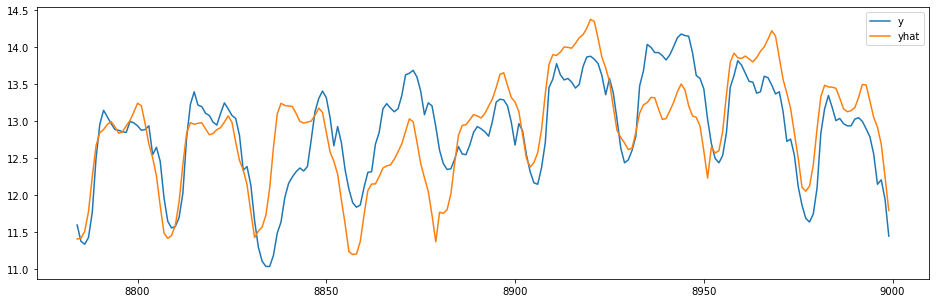

In [194]:
validation_dataframe.loc[:, 'yhat'] = validation_dataframe.loc[:, 'yhat'].apply(lambda x: 0 if x <= 0 else x)
validation_dataframe.loc[:, ['y', 'yhat']].plot(figsize=(16, 5))

In [195]:
validation_dataframe.loc[:, ['ds', 'yhat']].to_csv('neural_prophet_forecasting.csv', mode='a', header=False)

In [196]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
    y_true=validation_dataframe.loc[:, 'y'],
    y_pred=validation_dataframe.loc[:, 'yhat']
)
print(f'MAE = {mae}')

MAE = 0.43219675258353907


In [197]:
res = validation_dataframe.merge(prophet_forecasting, on='ds')

NameError: name 'prophet_forecasting' is not defined

In [ ]:
res.insert(0, 'res_y', 0)

In [ ]:
res.loc[:, 'res_y'] = res.apply(lambda x: (x['yhat'] + 0.75 * x['prophet'])/2, axis=1)

In [ ]:
res.loc[:, ['y', 'res_y']].plot(figsize=(16, 5))

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
    y_true=res.loc[:, 'y'],
    y_pred=res.loc[:, 'res_y']
)
print(f'MAE = {mae}')

In [ ]:
mae = mean_absolute_error(
    y_true=res.loc[:, 'y'],
    y_pred=res.loc[:, 'prophet']
)
print(f'MAE = {mae}')